In [1]:
# Data Manipulation
import numpy as np
import statistics as st
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = lambda x: f'{x:0.2f}'

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Preprocesing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Algorithms
import xgboost as xgb
# import lightgbm as lm
# import catboost as cbt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Preprocessed_data.csv', usecols=[x for x in range(1,32)])
data.describe(include='all')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age_Months,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Creative_professionals,Business_professionals,Technical_professionals,Service_professionals,Early_months,Spring_months,Summer_months,Good_credit_mix,Standard_credit_mix,Small_value_payments,Medium_value_payments,Large_value_payments,Credit_Score
count,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086.00,7086
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3874
mean,32.70,10.47,7.98,5.70,5.68,15.29,3.98,22.27,13.95,10.86,5.82,6.97,32.22,210.44,0.58,4.31,4.81,5.84,0.19,0.26,0.27,0.21,0.50,0.35,0.15,0.24,0.49,0.40,0.35,0.11,NaN
std,10.57,0.78,0.79,2.36,2.06,8.54,2.22,15.02,6.08,6.88,3.75,0.96,5.05,99.72,0.49,0.92,0.86,0.44,0.40,0.44,0.44,0.41,0.50,0.48,0.36,0.43,0.50,0.49,0.48,0.32,NaN
min,14.00,8.85,5.72,1.00,1.00,1.00,0.00,0.00,0.00,-6.44,0.00,3.69,21.26,2.00,0.00,1.50,2.34,4.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,24.00,9.84,7.36,4.00,4.00,8.00,2.00,11.00,10.00,5.77,3.00,6.45,28.05,131.00,0.00,3.68,4.22,5.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,32.00,10.47,7.99,6.00,6.00,15.00,4.00,19.00,15.00,9.79,6.00,7.14,32.20,209.00,1.00,4.30,4.80,5.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,41.00,11.12,8.62,8.00,7.00,21.00,6.00,29.00,19.00,15.53,9.00,7.66,36.46,289.75,1.00,5.02,5.40,6.09,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,NaN


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

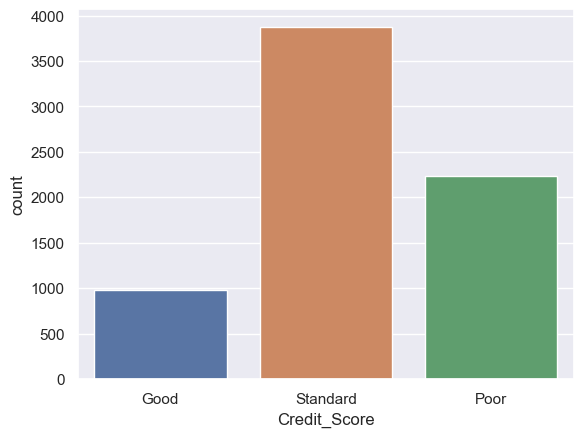

In [4]:
sns.countplot(data['Credit_Score'])

In [5]:
correlation = data.corr()['Credit_Score'].abs().sort_values(ascending=False)
correlation

KeyError: 'Credit_Score'

In [23]:
import statsmodels.api as sm

x = sm.add_constant()

variables = data.drop(['Credit_Score', 'Monthly_Inhand_Salary','Annual_Income','Monthly_Balance'], axis=1).select_dtypes(include=np.float64)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['columns'] = variables.columns.to_list()
vif.sort_values(by='VIF', ascending=False)

,VIF,columns
1,35.02,Outstanding_Debt
4,32.04,Amount_invested_monthly
2,29.42,Credit_Utilization_Ratio
3,28.75,Total_EMI_per_month
0,3.99,Changed_Credit_Limit


In [ ]:
# get all the features that has at least 0.6 in correlation to the 
# target
features = df_corr[df_corr > 0.6].index.to_list()[1:]
features                          # without the 'diagnosis' column

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(df,features)